In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import cvxpy as cp
from scipy.stats import poisson, uniform, expon, pareto
from scipy.optimize import minimize, fsolve
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

In [24]:
b1, b2 = sp.symbols('b_1 b_2')
c1, c2 = sp.symbols('c_1 c_2')
W      = sp.Symbol('w', positive=True)
# a      = sp.Symbol('a')
a = 4

In [25]:
x1 = b1**(-a) / (b1**(-a)+b2**(-a))
x2 = b2**(-a) / (b1**(-a)+b2**(-a))
x1

1/(b_1**4*(b_2**(-4) + b_1**(-4)))

In [26]:
u1 = (b1-c1)*x1
u2 = (b2-c2)*x2
u1

(b_1 - c_1)/(b_1**4*(b_2**(-4) + b_1**(-4)))

In [27]:
part1 = sp.diff(u1, b1)
part2 = sp.diff(u2, b2)
part2

1/(b_2**4*(b_2**(-4) + b_1**(-4))) - 4*(b_2 - c_2)/(b_2**5*(b_2**(-4) + b_1**(-4))) + 4*(b_2 - c_2)/(b_2**9*(b_2**(-4) + b_1**(-4))**2)

In [35]:
eq1 = sp.Eq(part1.evalf(subs={c1:c1, b2:2}), 0)
eq2 = sp.Eq(part2.evalf(subs={b2:2, c2:2}), 0) # works with alpha fixed
eq2

Eq(0.0625/(0.0625 + b_1**(-4)), 0)

In [36]:
solution = sp.solve([eq1, eq2], [b1, b2])
solution

[]

In [3]:
def equation_general(x, l, a):
    return a * l * x**2 * (1 - x)**(1/a) - (a - 1) * l * x * (1 - x)**(1/a) - a * x**(1 + 1/a) + (a + 1) * x**(1/a) - x**(1/a)

In [8]:

alpha_values = [3, 4, 5, 6]
l_values = np.linspace(1, 10, 100)  # Range of `l` values
x_values_dict = {a: [] for a in alpha_values}  # Store x-values for each alpha

for a in alpha_values:
    for l in l_values:
        x_initial_guess = 1-1/a
        try:
            x_solution = fsolve(equation_general, x_initial_guess, args=(l, a))
            if 0 < x_solution[0] < 0.9:
                x_values_dict[a].append(x_solution[0])
            else:
                x_values_dict[a].append(np.nan)
        except:
            x_values_dict[a].append(np.nan)

<ipython-input-3-01b9b6096d55>:2: RuntimeWarning: invalid value encountered in power
  return a * l * x**2 * (1 - x)**(1/a) - (a - 1) * l * x * (1 - x)**(1/a) - a * x**(1 + 1/a) + (a + 1) * x**(1/a) - x**(1/a)
/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


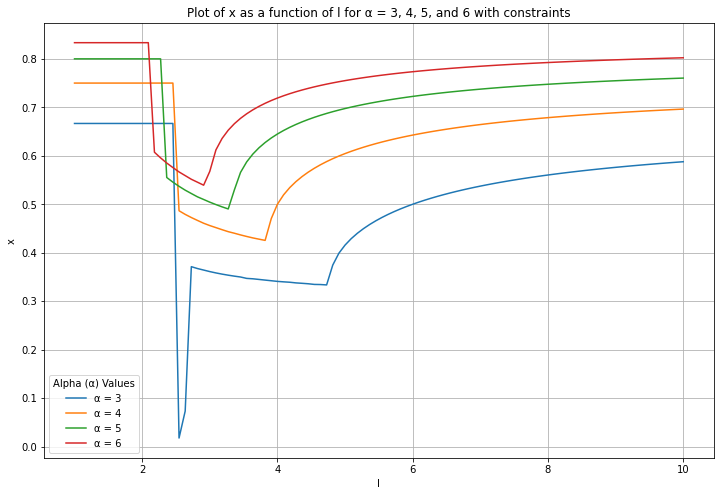

In [9]:

# Plot x as a function of l for each alpha value
plt.figure(figsize=(12, 8))
for a in alpha_values:
    plt.plot(l_values, x_values_dict[a], label=f"α = {a}")

# Labeling and displaying the plot
plt.xlabel("l")
plt.ylabel("x")
plt.title("Plot of x as a function of l for α = 3, 4, 5, and 6 with constraints")
plt.grid(True)
plt.legend(title="Alpha (α) Values")
plt.show()


In [11]:
# Define equations for a = 3, 4, 5, and 6
def equation_a3(x, l):
    return 3 * l * x**2 * (1 - x)**(1/3) - 2 * l * x * (1 - x)**(1/3) - 3 * x**(7/3) + 4 * x**(4/3) - x**(1/3)

def equation_a4(x, l):
    return 4 * l * x**2 * (1 - x)**(1/4) - 3 * l * x * (1 - x)**(1/4) - 4 * x**(7/4) + 5 * x**(4/4) - x**(1/4)

def equation_a5(x, l):
    return 5 * l * x**2 * (1 - x)**(1/5) - 4 * l * x * (1 - x)**(1/5) - 5 * x**(7/5) + 6 * x**(4/5) - x**(1/5)

def equation_a6(x, l):
    return 6 * l * x**2 * (1 - x)**(1/6) - 5 * l * x * (1 - x)**(1/6) - 6 * x**(7/6) + 7 * x**(4/6) - x**(1/6)

In [19]:
l_values = np.linspace(1, 10, 100)

a3res = []
a4res = []
a5res = []
a6res = []
for l in l_values:
    x_initial_guess = 1-1/3
    x_solution = fsolve(equation_a3, x_initial_guess, args=(l))
    a3res.append(x_solution[0])
    
    x_initial_guess = 1-1/4
    x_solution = fsolve(equation_a4, x_initial_guess, args=(l))
    a4res.append(x_solution[0])
    
    x_initial_guess = 1-1/5
    x_solution = fsolve(equation_a5, x_initial_guess, args=(l))
    a5res.append(x_solution[0])
    
    x_initial_guess = 1-1/6
    x_solution = fsolve(equation_a6, x_initial_guess, args=(l))
    a6res.append(x_solution[0])

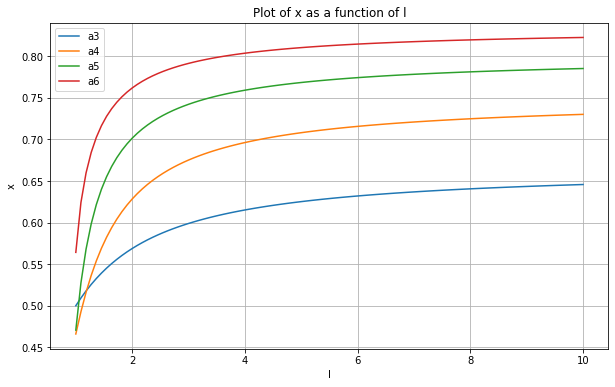

In [21]:
# Plot x as a function of l
plt.figure(figsize=(10, 6))

plt.plot(l_values, a3res, label="a3")
plt.plot(l_values, a4res, label="a4")
plt.plot(l_values, a5res, label="a5")
plt.plot(l_values, a6res, label="a6")

plt.xlabel("l")
plt.ylabel("x")
plt.title("Plot of x as a function of l")
plt.grid(True)
plt.legend()
plt.show()